In [43]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error ,mean_squared_error , r2_score
import random

In [3]:
pd.set_option("display.max_row", 800)
pd.set_option("display.max_column", 500)

In [4]:
data = pd.read_csv(r"C:\Users\nikhi\Desktop\project\WHO_life_expectancy\Life_Expectancy_Data.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
data.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [6]:
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             64     0.01               73.523582         62.0       492   
2             66     0.01               73.219243         64.0       430   
3             69     0.01               78.184215         67.0      2787   
4             71     0.01                7.097109         68.0      3013   

    BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0   19.1                  83    6.0               8.16         65.0   
1   18.6                  86   58.0               8.18         62.0   
2   18.1                  89   62.0               8.13         64.0   
3   17.6                  93   67.0               8.52         67.0   
4   17.2                  97   68.0               7.87         68.0   

    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0        0.1  584.259210  33736494.0                   17.2   
1        0.1  612.696514    327582.0                   17.5   
2        0.1  631.744976  31731688.0                   17.7   
3        0.1  669.959000   3696958.0                   17.9   
4        0.1   63.537231   2978599.0                   18.2   

    thinness 5-9 years  Income composition of resources  Schooling  
0                 17.3                            0.479       10.1  
1                 17.5                            0.476       10.0  
2                 17.7                            0.470        9.9  
3                 18.0                            0.463        9.8  
4                 18.2                            0.454        9.5

In [7]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [185]:
# data = data.rename(columns={ 'Life expectancy':'Life_expectancy', 'Adult Mortality':'Adult_Mortality','infant deaths':'infant_deaths',
#                             'percentage expenditure':'percentage_expenditure', 'Hepatitis B':'Hepatitis_B','under-five deaths':'under_five_deaths',
#                             'Total expenditure':'Total_expenditure','thinness  1-19 years': 'thinness_1-19_years',
#                            'Income composition of resources' : 'Income_composition_of_resources' ,'HIV/AIDS' :'HIV_AIDS' })

In [8]:
data = data.rename(columns=lambda x: x.strip())

In [9]:
num_col = data.select_dtypes(include=np.number).columns
print("Numerical Columns: \n",num_col)

cat_col = data.select_dtypes(exclude=np.number).columns
print("Categorical Columns: \n",cat_col)

Numerical Columns: 
 Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')
Categorical Columns: 
 Index(['Country', 'Status'], dtype='object')


In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['Status'] = label_encoder.fit_transform(data['Status'])

data.head()

Country  Year  Status  Life expectancy  Adult Mortality  infant deaths  \
0  Afghanistan  2015       1             65.0            263.0             62   
1  Afghanistan  2014       1             59.9            271.0             64   
2  Afghanistan  2013       1             59.9            268.0             66   
3  Afghanistan  2012       1             59.5            272.0             69   
4  Afghanistan  2011       1             59.2            275.0             71   

   Alcohol  percentage expenditure  Hepatitis B  Measles   BMI  \
0     0.01               71.279624         65.0     1154  19.1   
1     0.01               73.523582         62.0      492  18.6   
2     0.01               73.219243         64.0      430  18.1   
3     0.01               78.184215         67.0     2787  17.6   
4     0.01                7.097109         68.0     3013  17.2   

   under-five deaths  Polio  Total expenditure  Diphtheria  HIV/AIDS  \
0                 83    6.0               8.16        65.0       0.1   
1                 86   58.0               8.18        62.0       0.1   
2                 89   62.0               8.13        64.0       0.1   
3                 93   67.0               8.52        67.0       0.1   
4                 97   68.0               7.87        68.0       0.1   

          GDP  Population  thinness  1-19 years  thinness 5-9 years  \
0  584.259210  33736494.0                  17.2                17.3   
1  612.696514    327582.0                  17.5                17.5   
2  631.744976  31731688.0                  17.7                17.7   
3  669.959000   3696958.0                  17.9                18.0   
4   63.537231   2978599.0                  18.2                18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

In [11]:
print(data.isnull().sum())
print(data.shape)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64
(2938, 22)


Three ways to treat NA value

1) Drop the NA value
2) Treat the NA value
3) Use the algorith which support NA values

Method to treat NA value - 1)Replace with mean
                           2)Replace with median
                           3)Predict the NA values

In [12]:
# Replace with mean

for i in data.columns.drop('Country'):
    data[i].fillna(data[i].mean() ,inplace= True )

<function matplotlib.pyplot.show(*args, **kw)>

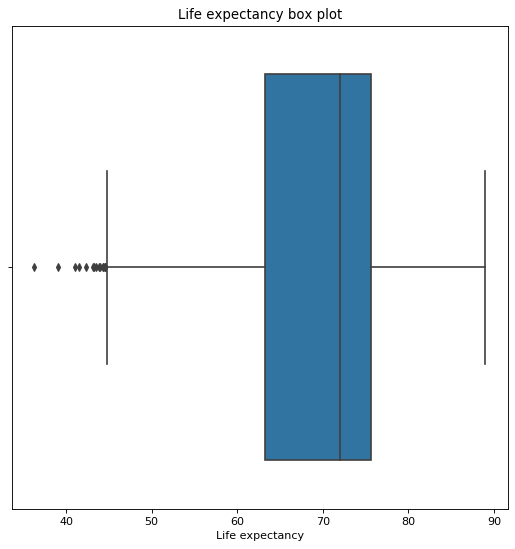

In [13]:
#Check the distribution of y variable (Life expectancy)

plt.figure(figsize=(8,8), dpi= 80)
sns.boxplot(data['Life expectancy'])
plt.title('Life expectancy box plot')
plt.show

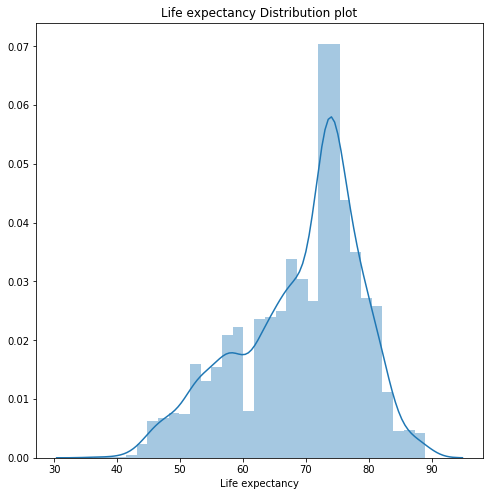

In [14]:
plt.figure(figsize=(8,8))
plt.title('Life expectancy Distribution plot')
sns.distplot(data['Life expectancy'])


**Summary:**

The y variable is having very few outliers and it is almost linearly distributed. so the assumption for linear regression 
holds true.

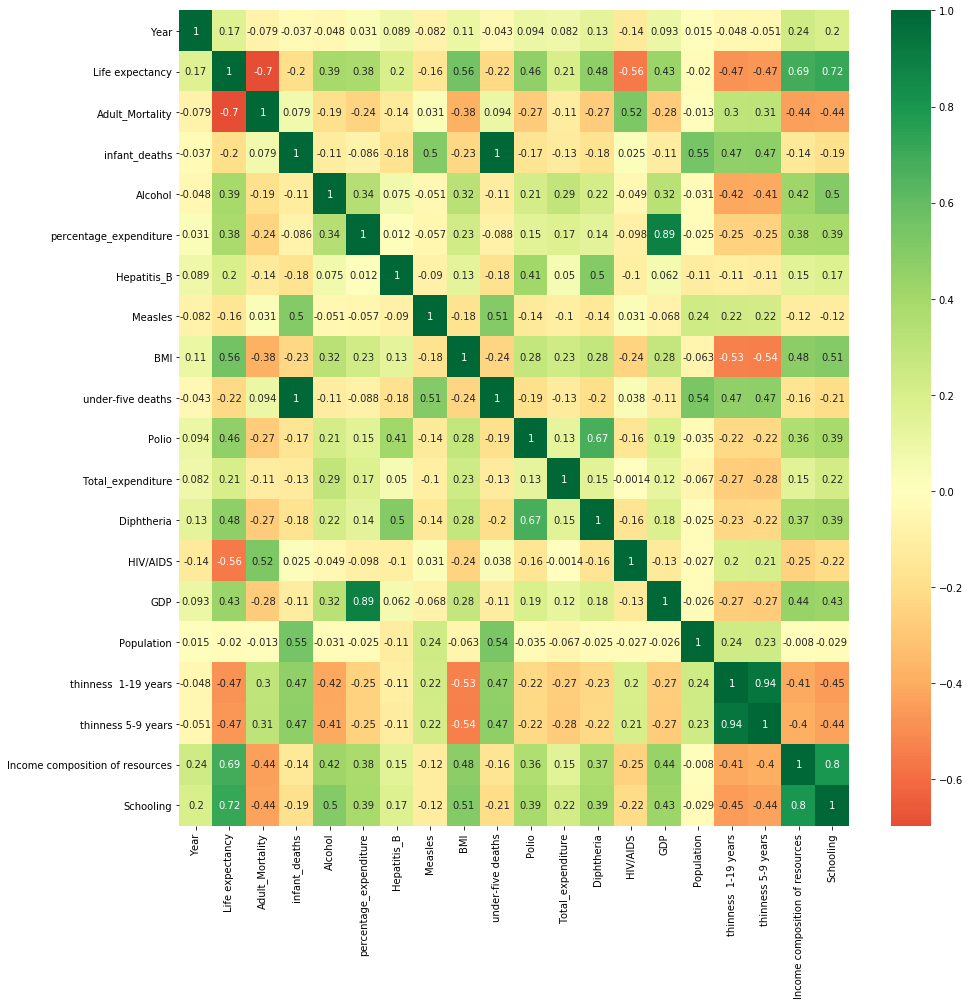

In [60]:
plt.figure(figsize=(15,15))

p = sns.heatmap(data[num_col].corr(), annot=True ,cmap='RdYlGn',center=0)

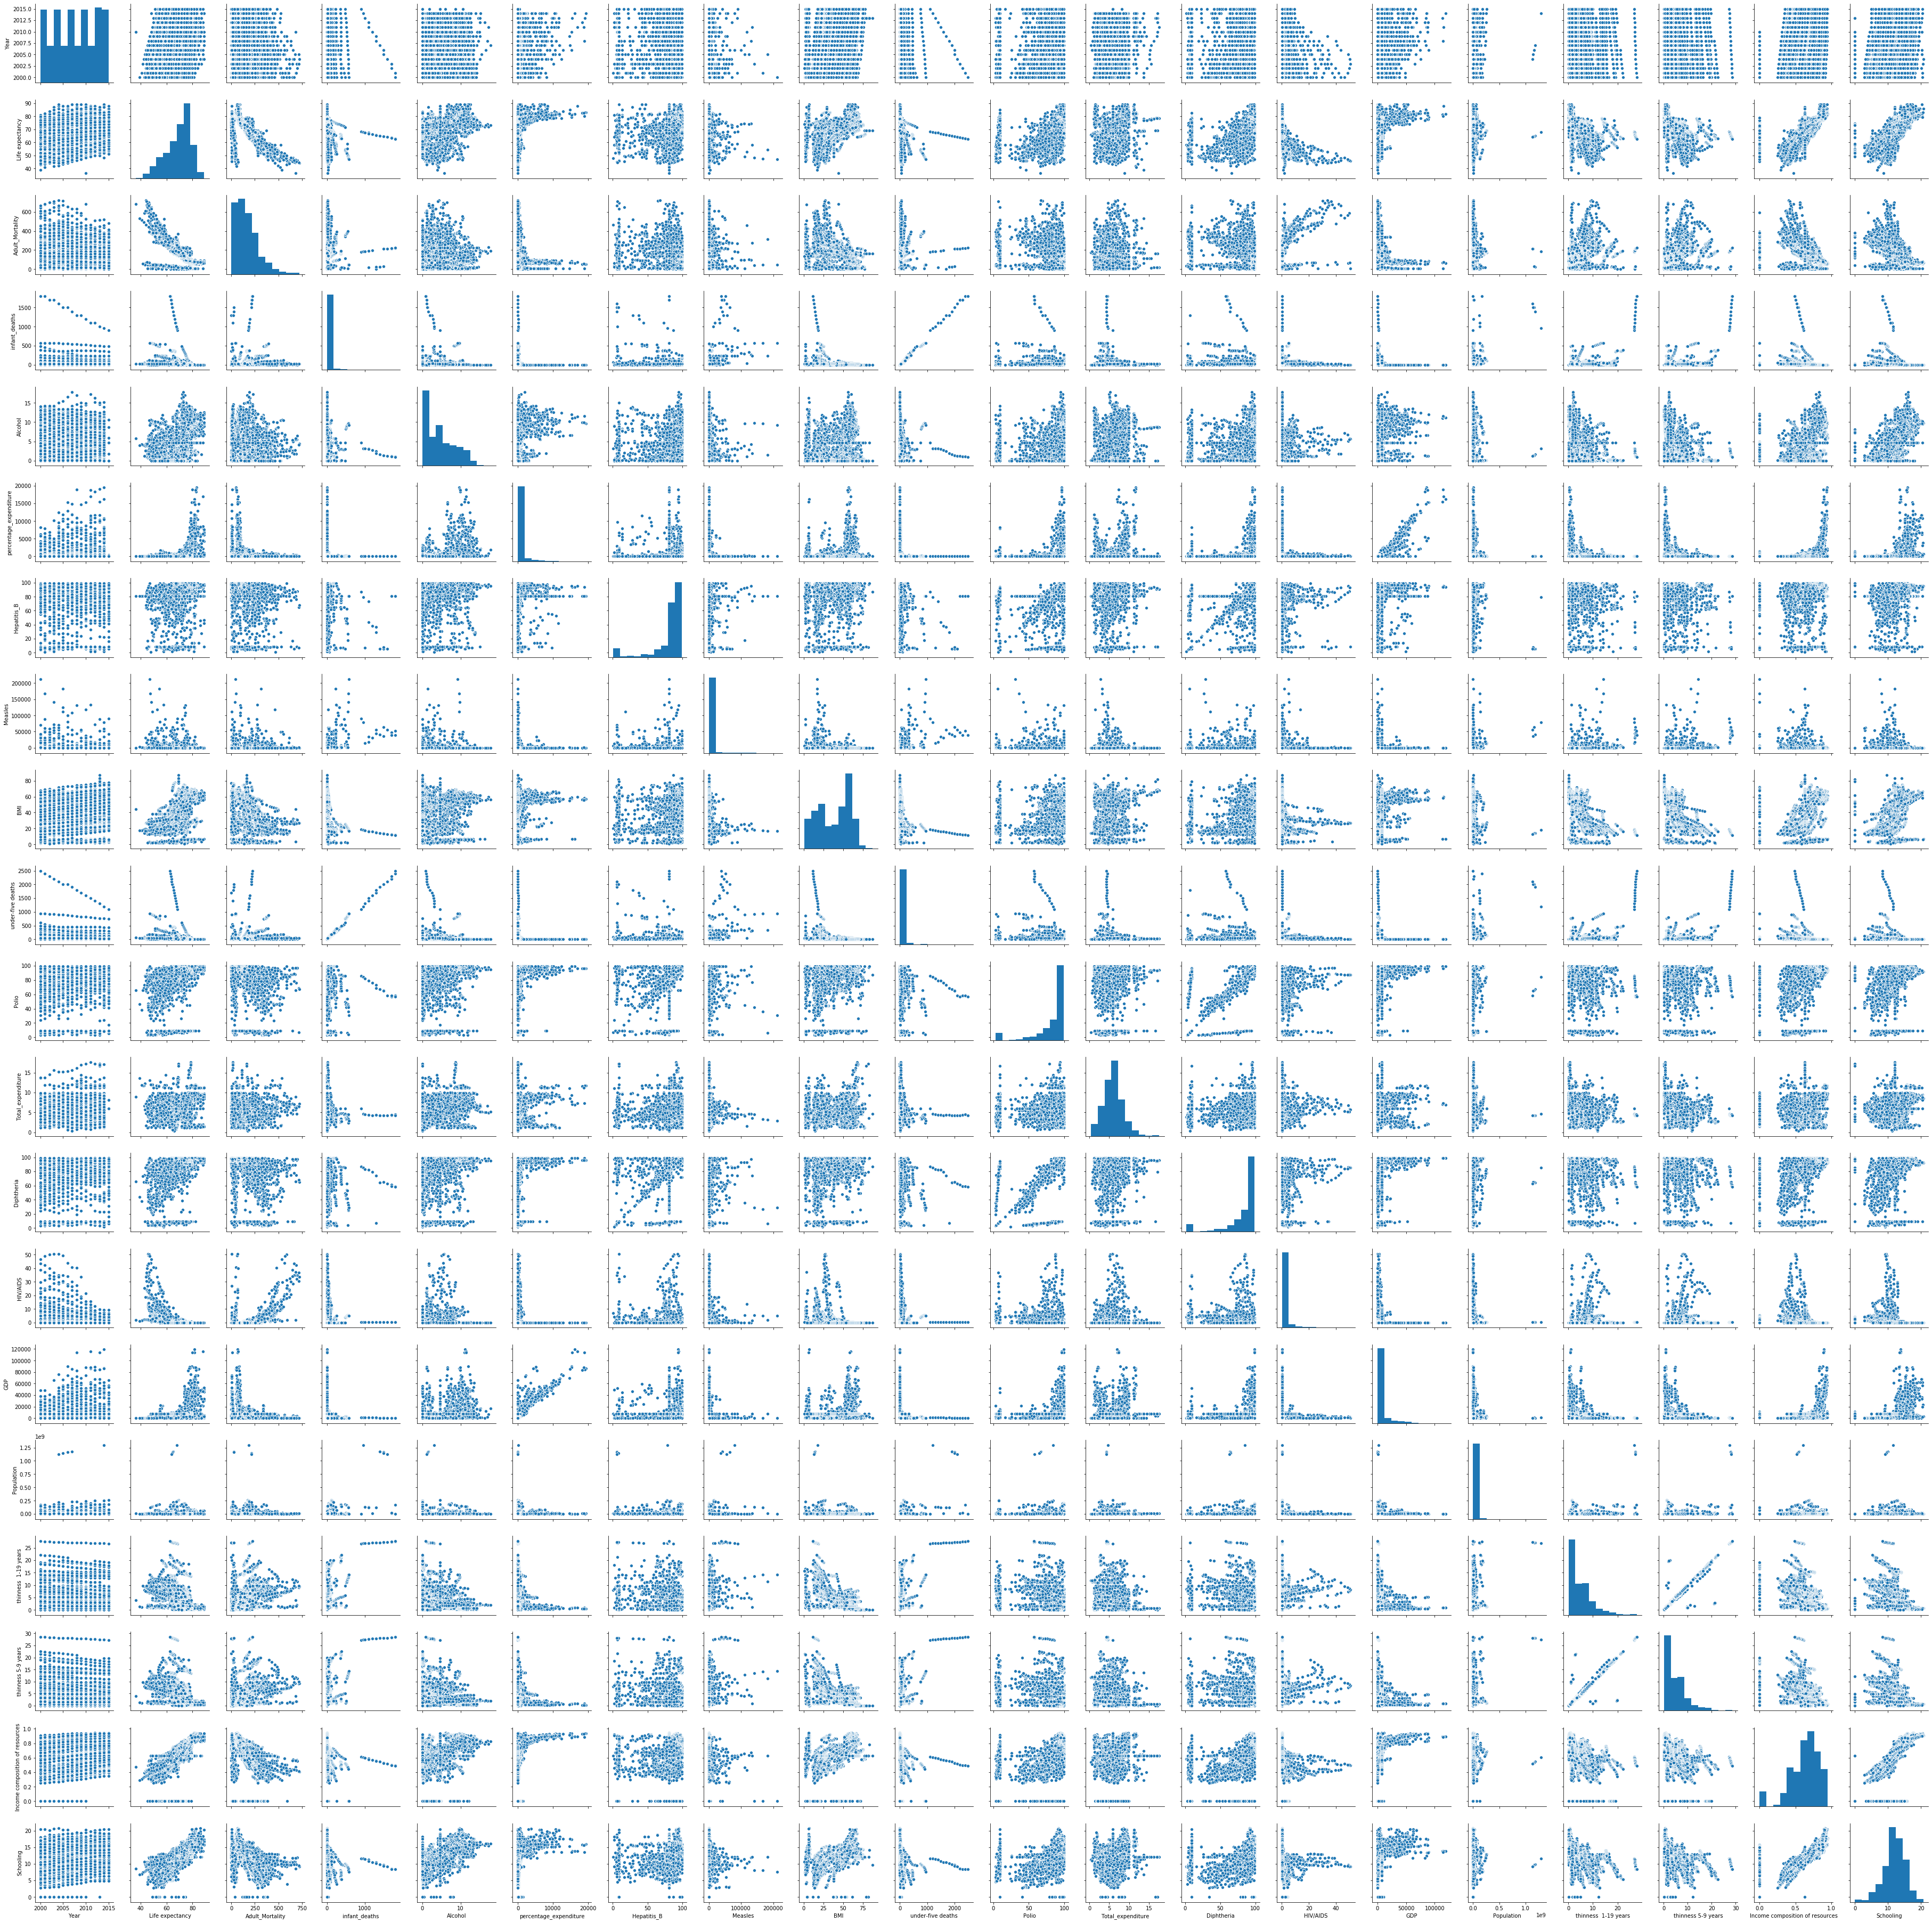

In [61]:
# Pair plots to know the relation between different features

ax = sns.pairplot(data[num_col])

In [15]:
data.head()

Country  Year  Status  Life expectancy  Adult Mortality  infant deaths  \
0  Afghanistan  2015       1             65.0            263.0             62   
1  Afghanistan  2014       1             59.9            271.0             64   
2  Afghanistan  2013       1             59.9            268.0             66   
3  Afghanistan  2012       1             59.5            272.0             69   
4  Afghanistan  2011       1             59.2            275.0             71   

   Alcohol  percentage expenditure  Hepatitis B  Measles   BMI  \
0     0.01               71.279624         65.0     1154  19.1   
1     0.01               73.523582         62.0      492  18.6   
2     0.01               73.219243         64.0      430  18.1   
3     0.01               78.184215         67.0     2787  17.6   
4     0.01                7.097109         68.0     3013  17.2   

   under-five deaths  Polio  Total expenditure  Diphtheria  HIV/AIDS  \
0                 83    6.0               8.16        65.0       0.1   
1                 86   58.0               8.18        62.0       0.1   
2                 89   62.0               8.13        64.0       0.1   
3                 93   67.0               8.52        67.0       0.1   
4                 97   68.0               7.87        68.0       0.1   

          GDP  Population  thinness  1-19 years  thinness 5-9 years  \
0  584.259210  33736494.0                  17.2                17.3   
1  612.696514    327582.0                  17.5                17.5   
2  631.744976  31731688.0                  17.7                17.7   
3  669.959000   3696958.0                  17.9                18.0   
4   63.537231   2978599.0                  18.2                18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

In [19]:
# Train_test_split
X = data.drop(['Country','Life expectancy'], axis=1)
y = data[['Life expectancy']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 , random_state=1234)

In [20]:
X_train_stepwise = X_train[['Schooling', 'Adult Mortality', 'HIV/AIDS', 'Diphtheria', 'BMI', 'Income composition of resources', 'Status',
                            'percentage expenditure', 'Polio', 'Measles', 'Hepatitis B', 'under-five deaths', 'infant deaths', 'thinness  1-19 years']]                         

# Add a constant and Build a second fitted model 

X_train_stepwise = sm.add_constant(X_train_stepwise)
lm_stepwise = sm.OLS(y_train, X_train_stepwise).fit()

#Summary of linear model
print(lm_stepwise.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     677.3
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:31:17   Log-Likelihood:                -5807.2
No. Observations:                2056   AIC:                         1.164e+04
Df Residuals:                    2041   BIC:                         1.173e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [22]:
X_train_stepwise.shape

(2056, 15)

In [25]:
X_test.shape

(882, 20)

In [24]:
# Now let's use our model to make predictions.
X_train_stepwise = X_train_stepwise.drop('const',axis=1)

In [26]:
X_train_stepwise.shape

(2056, 14)

In [27]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_stepwise.columns]

In [28]:
X_test_new.shape

(882, 14)

In [29]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [30]:
X_test_new.shape

(882, 15)

In [32]:
# Making predictions
prediction = lm_stepwise.predict(X_test_new)

In [33]:
model_mse = mean_squared_error(prediction,y_test)
model_mse

15.972714682410807

In [34]:
from sklearn.metrics import r2_score 
r2_score(y_test, prediction)

0.8055872985506844

Text(0, 0.5, 'y_pred')

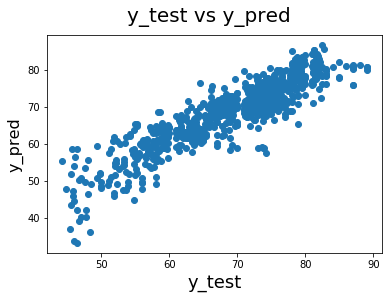

In [35]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,prediction)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

In [36]:
print(lm_stepwise.summary())


                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     677.3
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:38:40   Log-Likelihood:                -5807.2
No. Observations:                2056   AIC:                         1.164e+04
Df Residuals:                    2041   BIC:                         1.173e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [37]:
def mean_absolute_percentage_error(y_true,y_pred):
    y_true, y_pred = np.array(y_true) ,np.array(y_pred)
    return np.mean(np.abs(( y_true - y_pred)/y_true)) *100
    

In [38]:
mean_absolute_percentage_error(y_test,prediction)

15.027749599323844

### Model Prediction and Evaluation

In [61]:
X_test_stepwise = sm.add_constant(X_test_stepwise)

In [60]:
X_test_stepwise = X_test[['Schooling', 'Adult Mortality', 'HIV/AIDS', 'Diphtheria', 'BMI', 'Income composition of resources', 'Status',
                            'percentage expenditure', 'Polio', 'Measles', 'Hepatitis B', 'under-five deaths', 'infant deaths', 'thinness  1-19 years']]                         
actual = y_test[["Life expectancy"]]

In [62]:
prediction = lm_stepwise.predict(X_test_stepwise)

In [63]:
model_mse = mean_squared_error(prediction,actual)
model_mse

15.972714682410807

In [64]:
def mean_absolute_percentage_error(y_true,y_pred):
    y_true, y_pred = np.array(y_true) ,np.array(y_pred)
    return np.mean(np.abs(( y_true - y_pred)/y_true)) *100
    

In [65]:
mean_absolute_percentage_error(actual,prediction)

15.027749599323844

In [41]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 3.0257649961070645
MSE: 15.972714682410807
RMSE: 3.996587879980973


In [42]:
from sklearn.utils import check_arrays
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = check_arrays(y_true, y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

ImportError: cannot import name 'check_arrays' from 'sklearn.utils' (C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\utils\__init__.py)

## By traditional way

In [135]:
reg_rf = LinearRegression()
reg_rf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [136]:
y_pred = reg_rf.predict(X_test)

In [137]:
Train_accuracy = reg_rf.score(X_train, y_train)
Train_accuracy

0.8234235882453508

In [138]:
Test_accuracy = reg_rf.score(X_test, y_test)
Test_accuracy

0.8073346987451269

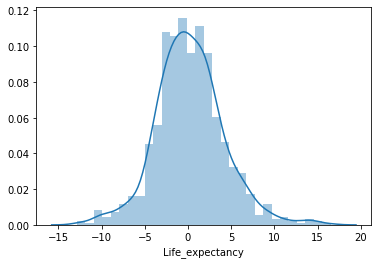

In [139]:
sns.distplot(y_test-y_pred)
plt.show()

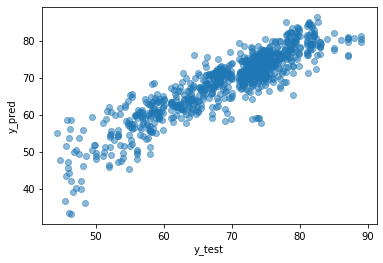

In [140]:

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [40]:
from sklearn import metrics

In [143]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3.0094117235439133
MSE: 15.829150375481543
RMSE: 3.978586479578085
